# Exercise 7

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [3]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [4]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [6]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
y_train[0]

array([6])

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

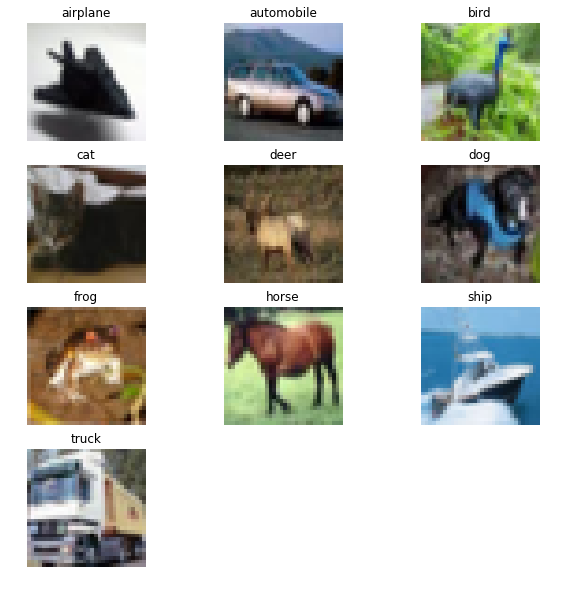

In [10]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras
from keras import optimizers

In [12]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.optimizers import RMSprop
model.compile(loss = 'categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6),
              metrics = ['accuracy'])

In [14]:
model.fit(X_train, Y_train, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 2.3132 - acc: 0.2236
Epoch 2/100
 - 1s - loss: 2.1293 - acc: 0.2821
Epoch 3/100
 - 1s - loss: 2.0901 - acc: 0.2951
Epoch 4/100
 - 1s - loss: 2.0497 - acc: 0.3077
Epoch 5/100
 - 1s - loss: 2.0273 - acc: 0.3211
Epoch 6/100
 - 1s - loss: 2.0278 - acc: 0.3214
Epoch 7/100
 - 1s - loss: 1.9978 - acc: 0.3314
Epoch 8/100
 - 1s - loss: 1.9928 - acc: 0.3365
Epoch 9/100
 - 1s - loss: 1.9699 - acc: 0.3377
Epoch 10/100
 - 1s - loss: 1.9565 - acc: 0.3448
Epoch 11/100
 - 1s - loss: 1.9510 - acc: 0.3486
Epoch 12/100
 - 1s - loss: 1.9437 - acc: 0.3488
Epoch 13/100
 - 1s - loss: 1.9226 - acc: 0.3580
Epoch 14/100
 - 1s - loss: 1.9240 - acc: 0.3612
Epoch 15/100
 - 1s - loss: 1.9164 - acc: 0.3616
Epoch 16/100
 - 1s - loss: 1.9029 - acc: 0.3648
Epoch 17/100
 - 1s - loss: 1.9069 - acc: 0.3622
Epoch 18/100
 - 1s - loss: 1.9041 - acc: 0.3683
Epoch 19/100
 - 1s - loss: 1.8864 - acc: 0.3710
Epoch 20/100
 - 1s - loss: 1.8813 - acc: 0.3674
Epoch 21/100
 - 1s - loss: 1.8684 - acc: 0.3746
E

In [15]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 41us/step
Test score: 2.187942636489868
Test accuracy: 0.3392


In [ ]:
Esta rede obtuvo un accuray por debajo del 30% por ende el modelo no es muy bueno ya que esta acertando el 30% de las veces
por ende el 70% de las veces tan tendiendo problemas.

# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D (2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [17]:
from keras.optimizers import RMSprop
model.compile(loss = 'categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6),
              metrics = ['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 13s - loss: 1.8717 - acc: 0.3312
Epoch 2/10
 - 13s - loss: 1.5454 - acc: 0.4554
Epoch 3/10
 - 14s - loss: 1.4118 - acc: 0.5021
Epoch 4/10
 - 14s - loss: 1.3321 - acc: 0.5338
Epoch 5/10
 - 14s - loss: 1.2759 - acc: 0.5557
Epoch 6/10
 - 14s - loss: 1.2331 - acc: 0.5704
Epoch 7/10
 - 15s - loss: 1.1858 - acc: 0.5861
Epoch 8/10
 - 15s - loss: 1.1620 - acc: 0.5986
Epoch 9/10
 - 15s - loss: 1.1418 - acc: 0.6059
Epoch 10/10
 - 15s - loss: 1.1145 - acc: 0.6148


In [19]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 6s 568us/step
Test score: 1.3334010850906373
Test accuracy: 0.5356


In [ ]:
incluyendo combuluciones el modelo mejora considerablemente pasando de un 30% s un 50%.

# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [20]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [21]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [22]:
x_train2=model_vgg16.predict(X_train)

In [23]:
x_train2.shape

(10000, 1, 1, 512)

In [24]:
x_train2.shape[1:]

(1, 1, 512)

In [25]:
model=Sequential()
model.add(Flatten(input_shape=x_train2.shape[1:]))
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [27]:
model.fit(x_train2, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 3s - loss: 1.6839 - acc: 0.4016
Epoch 2/50
 - 3s - loss: 1.4083 - acc: 0.5031
Epoch 3/50
 - 2s - loss: 1.3266 - acc: 0.5331
Epoch 4/50
 - 3s - loss: 1.2604 - acc: 0.5595
Epoch 5/50
 - 3s - loss: 1.2285 - acc: 0.5694
Epoch 6/50
 - 3s - loss: 1.1839 - acc: 0.5856
Epoch 7/50
 - 3s - loss: 1.1540 - acc: 0.5963
Epoch 8/50
 - 3s - loss: 1.1332 - acc: 0.6098
Epoch 9/50
 - 3s - loss: 1.1050 - acc: 0.6147
Epoch 10/50
 - 3s - loss: 1.0771 - acc: 0.6273
Epoch 11/50
 - 3s - loss: 1.0568 - acc: 0.6381
Epoch 12/50
 - 3s - loss: 1.0273 - acc: 0.6479
Epoch 13/50
 - 3s - loss: 1.0186 - acc: 0.6504
Epoch 14/50
 - 3s - loss: 0.9945 - acc: 0.6561
Epoch 15/50
 - 3s - loss: 0.9793 - acc: 0.6619
Epoch 16/50
 - 3s - loss: 0.9638 - acc: 0.6671
Epoch 17/50
 - 3s - loss: 0.9435 - acc: 0.6708
Epoch 18/50
 - 3s - loss: 0.9270 - acc: 0.6787
Epoch 19/50
 - 3s - loss: 0.9149 - acc: 0.6837
Epoch 20/50
 - 3s - loss: 0.8990 - acc: 0.6876
Epoch 21/50
 - 3s - loss: 0.8849 - acc: 0.6991
Epoch 22/50
 - 3s - lo

In [28]:
x_test2=model_vgg16.predict(X_test)

In [196]:
x_test2.shape

(10000, 1, 1, 512)

In [29]:
score = model.evaluate(x_test2, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 77us/step 
Test score: 1.8955582160949707
Test accuracy: 0.571


In [30]:
model_vgg16.predict(X_train[[1]])

array([[[[9.7221613e-01, 0.0000000e+00, 5.8577222e-01, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          1.4686154e+00, 0.0000000e+00, 4.4265032e-02, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.8961558e-01,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0008144e+00,
          0.0000000e+00, 0.0000000e+00, 2.1144360e-02, 4.7217378e-01,
          1.3200772e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          1.8814332e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 2.9907054e-01, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 6.9428712e-01, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 1.3694730e+00, 7.2360361e-01,
          0.0000000e

In [ ]:
Incluyendo un modelo pre entrenado el accuracy mejor un poco mas de 7 puntos porcentuales.

# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

In [135]:
from keras.applications.mobilenet import MobileNet


In [141]:
Model_MobileNet=MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

C:\Users\DELL\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:216: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 12s 1us/step


In [142]:
Model_MobileNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (Activation)      (None, None, None, 32)    0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
__________

In [198]:
x_trainp3=Model_MobileNet.predict(X_train)

In [199]:
x_trainp3.shape

(10000, 1, 1, 1024)

In [209]:
model=Sequential()
model.add(Flatten(input_shape=x_train3.shape[1:]))
model.add(Dense(units=1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_34 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                10250     
_________________________________________________________________
activation_35 (Activation)   (None, 10)                0         
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________


In [210]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.003),
              metrics = ['accuracy'])

In [202]:
x_testp3=Model_MobileNet.predict(X_test)

In [211]:
x_test3.shape

(10000, 1, 1, 1024)

In [212]:
model.fit(x_trainp3, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 9s - loss: 2.2947 - acc: 0.1238
Epoch 2/50
 - 9s - loss: 2.2617 - acc: 0.1520
Epoch 3/50
 - 8s - loss: 2.2497 - acc: 0.1568
Epoch 4/50
 - 8s - loss: 2.2445 - acc: 0.1634
Epoch 5/50
 - 8s - loss: 2.2432 - acc: 0.1675
Epoch 6/50
 - 8s - loss: 2.2392 - acc: 0.1639
Epoch 7/50
 - 8s - loss: 2.2374 - acc: 0.1670
Epoch 8/50
 - 8s - loss: 2.2346 - acc: 0.1680
Epoch 9/50
 - 9s - loss: 2.2364 - acc: 0.1681
Epoch 10/50
 - 8s - loss: 2.2334 - acc: 0.1741
Epoch 11/50
 - 8s - loss: 2.2329 - acc: 0.1703
Epoch 12/50
 - 8s - loss: 2.2326 - acc: 0.1626
Epoch 13/50
 - 9s - loss: 2.2285 - acc: 0.1674
Epoch 14/50
 - 8s - loss: 2.2360 - acc: 0.1679
Epoch 15/50
 - 9s - loss: 2.2352 - acc: 0.1647
Epoch 16/50
 - 8s - loss: 2.2323 - acc: 0.1669
Epoch 17/50
 - 8s - loss: 2.2333 - acc: 0.1746
Epoch 18/50
 - 8s - loss: 2.2266 - acc: 0.1761
Epoch 19/50
 - 9s - loss: 2.2312 - acc: 0.1704
Epoch 20/50
 - 9s - loss: 2.2306 - acc: 0.1738
Epoch 21/50
 - 9s - loss: 2.2379 - acc: 0.1670
Epoch 22/50
 - 8s - lo

In [213]:
score = model.evaluate(x_testp3, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 235us/step
Test score: 2.2058842601776125
Test accuracy: 0.1855


In [ ]:
realizando lo anterior el modelo disminuyo considerablemente